**FINDING THE ACCURACY AND EFFICIENCY OF OUR REGRESSION ALGORITHM**

Regression metrices

*   MAE
*   MSE
*   RMSE
*   R2 score
*   Adjusted R2 score

LOSS FUNCTIONS: MAE, MSE, RMSE

**MAE:Mean Absolute Error**

error with respect to every point

actual value - predicted value

total absolute error

|y1 - y1^| + |y2 - y2^| + ... + |yn - yn^|

mean absolute error:

mae = |y1 - y1^| + |y2 - y2^| + ... + |yn - yn^| / n

mae = sum i = 1 to n |yi - yi^| / n

advantage:

1) same unit of y as output column

2) handles outliers

disadvantage

1) graph not differentiable at 0


**MSE: mean square error**

use square instead of mod as in mae

mse = (y1 - y1^)^2 + (y2 - y2^)^2 + ... + (yn - yn^)^2 / n

mse = sum i = 1 to n (yi - yi^)^2 / n

advantage:

1) can be differentiable

2) unit would be (lpa)^2

3) penelises outliers, not robust to outliers

**RMSE: root mean square error**

mse = square root (sum i = 1 to n (yi - yi^)^2 / n)

advantage:

1) output has same unit as y

disadvantage:

1) not robust to errors

**R2 score: coefficient of determination**

compare how much better is the regression line as compared to mean line

R2 = 1 - SSr/SSm

SSr = sum of squared error in the regression line

SSm = sum of sqaured errpr in mean line

R2 = 1 - (sum i = 1 to n (yi - yi^)^2)rg / (sum i = 1 to n (yi - yi^)^2)m

R2 score is zero when mean line is as faulty as regression line

R2 score is 0 when regression line is at no fault at all

higher R2 means more perfection

lower R2 means more faultiness

when R2 score is negative, SSr > SSm, which means regression line making more mistakes then the mean line

R2 is 0.8, means input column explain 80% of variance in output

**disadvantage of R2 score:**

more input columns, more R2 value

irrelevent columns also contributes to R2 value

**Adjusted R2 value:**

R2 adj = 1 - ( (1 - R2)(n - 1)/(n-1-k) )

n = number of rows

k = total number of independent values

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [1]:
from google.colab import files
uploaded = files.upload()

Saving placement.csv to placement.csv


In [31]:
df = pd.read_csv('/content/placement.csv')

In [32]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'package (in lpa')

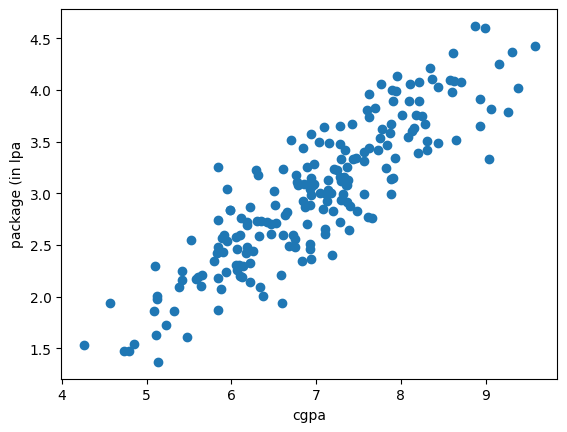

In [33]:
plt.scatter(df['cgpa'], df['package'])
plt.xlabel('cgpa')
plt.ylabel('package (in lpa')

In [34]:
x = df.iloc[:,0].values
y = df.iloc[:,1].values

In [35]:
x

array([6.89, 5.12, 7.82, 7.42, 6.94, 7.89, 6.73, 6.75, 6.09, 8.31, 5.32,
       6.61, 8.94, 6.93, 7.73, 7.25, 6.84, 5.38, 6.94, 7.48, 7.28, 6.85,
       6.14, 6.19, 6.53, 7.28, 8.31, 5.42, 5.94, 7.15, 7.36, 8.1 , 6.96,
       6.35, 7.34, 6.87, 5.99, 5.9 , 8.62, 7.43, 9.38, 6.89, 5.95, 7.66,
       5.09, 7.87, 6.07, 5.84, 8.63, 8.87, 9.58, 9.26, 8.37, 6.47, 6.86,
       8.2 , 5.84, 6.6 , 6.92, 7.56, 5.61, 5.48, 6.34, 9.16, 7.36, 7.6 ,
       5.11, 6.51, 7.56, 7.3 , 5.79, 7.47, 7.78, 8.44, 6.85, 6.97, 6.94,
       8.99, 6.59, 7.18, 7.63, 6.1 , 5.58, 8.44, 4.26, 4.79, 7.61, 8.09,
       4.73, 6.42, 7.11, 6.22, 7.9 , 6.79, 5.83, 6.63, 7.11, 5.98, 7.69,
       6.61, 7.95, 6.71, 5.13, 7.05, 7.62, 6.66, 6.13, 6.33, 7.76, 7.77,
       8.18, 5.42, 8.58, 6.94, 5.84, 8.35, 9.04, 7.12, 7.4 , 7.39, 5.23,
       6.5 , 5.12, 5.1 , 6.06, 7.33, 5.91, 6.78, 7.93, 7.29, 6.68, 6.37,
       5.84, 6.05, 7.2 , 6.1 , 5.64, 7.14, 7.91, 7.19, 7.91, 6.76, 6.93,
       4.85, 6.17, 5.84, 6.07, 5.66, 7.57, 8.28, 6.

In [36]:
y

array([3.26, 1.98, 3.25, 3.67, 3.57, 2.99, 2.6 , 2.48, 2.31, 3.51, 1.86,
       2.6 , 3.65, 2.89, 3.42, 3.23, 2.35, 2.09, 2.98, 2.83, 3.16, 2.93,
       2.3 , 2.48, 2.71, 3.65, 3.42, 2.16, 2.24, 3.49, 3.26, 3.89, 3.08,
       2.73, 3.42, 2.87, 2.84, 2.43, 4.36, 3.33, 4.02, 2.7 , 2.54, 2.76,
       1.86, 3.58, 2.26, 3.26, 4.09, 4.62, 4.43, 3.79, 4.11, 2.61, 3.09,
       3.39, 2.74, 1.94, 3.09, 3.31, 2.19, 1.61, 2.09, 4.25, 2.92, 3.81,
       1.63, 2.89, 2.99, 2.94, 2.35, 3.34, 3.62, 4.03, 3.44, 3.28, 3.15,
       4.6 , 2.21, 3.  , 3.44, 2.2 , 2.17, 3.49, 1.53, 1.48, 2.77, 3.55,
       1.48, 2.72, 2.66, 2.14, 4.  , 3.08, 2.42, 2.79, 2.61, 2.84, 3.83,
       3.24, 4.14, 3.52, 1.37, 3.  , 3.74, 2.82, 2.19, 2.59, 3.54, 4.06,
       3.76, 2.25, 4.1 , 2.37, 1.87, 4.21, 3.33, 2.99, 2.88, 2.65, 1.73,
       3.02, 2.01, 2.3 , 2.31, 3.16, 2.6 , 3.11, 3.34, 3.12, 2.49, 2.01,
       2.48, 2.58, 2.83, 2.6 , 2.1 , 3.13, 3.89, 2.4 , 3.15, 3.18, 3.04,
       1.54, 2.42, 2.18, 2.46, 2.21, 3.4 , 3.67, 2.

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2, random_state=2)

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
lr = LinearRegression()

In [50]:
x_train = x_train.reshape(-1, 1)

In [51]:
lr.fit(x_train, y_train)

LinearRegression()

Text(0, 0.5, 'package (in lpa')

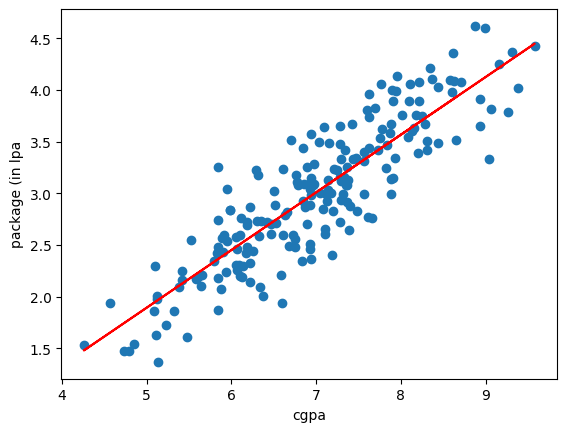

In [52]:
plt.scatter(df['cgpa'], df['package'])
plt.plot(x_train, lr.predict(x_train), color = 'red')
plt.xlabel('cgpa')
plt.ylabel('package (in lpa')

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [54]:
x_test = x_test.reshape(-1, 1)

In [58]:
y_pred = lr.predict(x_test)

In [57]:
y_test

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [64]:
print('MAE', mean_absolute_error(y_test,y_pred), ' in lpa')

MAE 0.2884710931878175  in lpa


In [61]:
print('MSE', mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [63]:
print('RMSE', np.sqrt(mean_squared_error(y_test,y_pred)), 'in lpa')

RMSE 0.34827051717731616 in lpa


In [67]:
print('R2 score', r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.780730147510384


In [66]:
#adjusted r2 score
x_test.shape

(40, 1)

In [68]:
1 - (((1-r2)*(40-1)) / (40-1-1))

0.7749598882343415

In [69]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa', 'random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.793227,3.26
1,5.12,0.573306,1.98
2,7.82,0.266764,3.25
3,7.42,0.350906,3.67
4,6.94,0.289740,3.57


Text(0, 0.5, 'package')

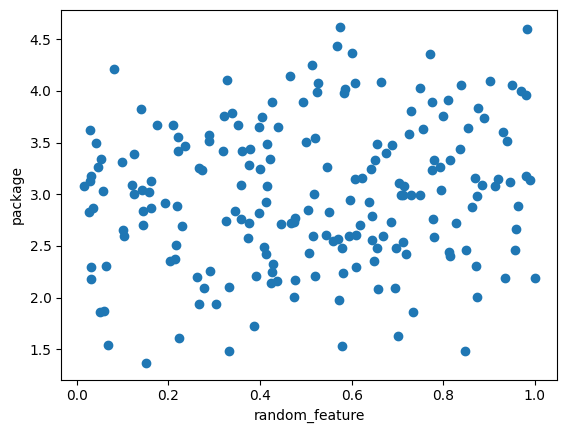

In [72]:
plt.scatter(new_df1['random_feature'], new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('package')

In [87]:
X = df.iloc[:,0].values
Y = df.iloc[:,1].values

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size =0.2, random_state=2)

In [109]:
from sklearn.linear_model import LinearRegression

In [110]:
lr = LinearRegression()

In [115]:
X_train = np.array(X_train).reshape(-1, 1)

In [116]:
lr.fit(X_train, Y_train)

LinearRegression()

In [117]:
X_test = np.array(X_test).reshape(-1, 1)

In [118]:
Y_pred = lr.predict(X_test)

In [120]:
print('R2 score', r2_score(Y_test, Y_pred))
r2 = r2_score(Y_test, Y_pred)

R2 score 0.780730147510384


In [121]:
1 - ((1-r2)* (40-1)/ (40-1-2))

0.7688777230514858